# Clonamos el repo y cargamos utilidades de colab

In [41]:
!git clone https://github.com/b0tm4r/RNN---Divisas.git

fatal: destination path 'RNN---Divisas' already exists and is not an empty directory.


In [42]:
from google.colab import drive # Para cargar el disco
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
!ls '/content/drive/My Drive' 

'Colab Notebooks'


# Parte 1 - Preprocesado de los datos

In [44]:
# Importación de las librerías
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

# Datos de entrada

* **periodos_a_predecir**: El número de periodos que queremos mostrar en nustra predicción. 15 son tres semanas completas de bolsa

* **Valor**. El datasets de datos del valor que queramos predecir lo puedes descargar desde http://investing.com. Para este ejemplo he descargado tres valores, desde el 1-1-2015 hasta el 8-1-2021

  * EUR/USD
  * EUR/JPY
  * USD/JPY


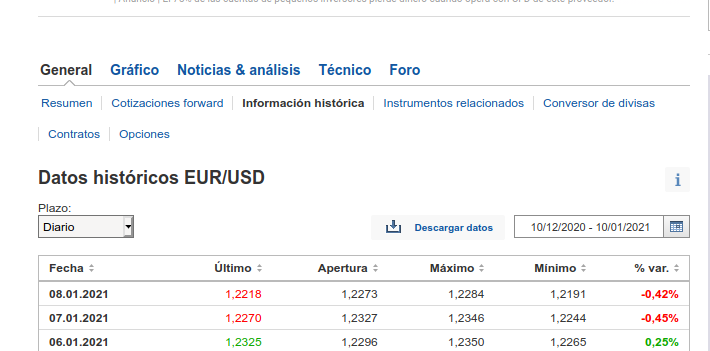

In [45]:
periodos_a_predecir = 15
valor = 'EUR-USD'

## Importar el dataset



In [46]:
dir_path = '/content/RNN---Divisas/'

dataset_train = pd.read_csv(os.path.join(dir_path,'datasets',"{}.csv".format(valor)))

Aplicamos al datasets la opcion reverse xq los datos vienen de mayor a menor fecha, y los queremos al revés

In [47]:
dataset_train = dataset_train.iloc[::-1]

Solo nos quedamos con el precio de cierre. El resto de columnas no las necesitamos para este ejemplo.

In [48]:
data_train = dataset_train.iloc[:, 1:2]
data_train['Close'] = data_train.iloc[:,:].apply(lambda x: x.replace(',','.'))
data_train['Close'] = data_train['Close'].astype(float)
data_train = data_train.iloc[:, 1:2]

# Parte 2 -Carga del modelo y predicción

In [49]:
mi_modelo = load_model(os.path.join(dir_path,'models',"{}.h5".format(valor)))
sc = MinMaxScaler(feature_range = (0, 1))

In [50]:
dataset_total = data_train['Close']
datataset_total = dataset_total.reset_index(drop=True)

In [51]:
for x in range(0,periodos_a_predecir):
    inputs = dataset_total[-60:].values
    inputs = inputs.reshape(-1,1)
    inputs = sc.fit_transform(inputs)

    X_test = []

    X_test.append(inputs[:, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    predicted_stock_price = mi_modelo.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    predicted_stock_price_value =  predicted_stock_price[0][0]
    dataset_total = dataset_total.append( pd.Series([predicted_stock_price_value]), ignore_index=True)
 

# Visualizar los Resultados

Si no queremos grabar los resultados en gogle drive, basta con eliminar la línea `plt.savefig`

In [59]:
def graficar_resultado(periodos_grafico,dataset_total, periodos_a_predecir):
    x = dataset_total[-periodos_a_predecir-1:].values
    i = periodos_grafico-periodos_a_predecir
    y = range(i-1,i+periodos_a_predecir)
    
    # Visualizar los Resultados
    plt.plot(dataset_total[-periodos_grafico:-periodos_a_predecir].values, color = 'blue', label = 'Precio del {}'.format(valor))
    plt.scatter(y,x,s=1,color = 'red', label = 'Precio Predicho del {}'.format(valor))
    
    # plt.plot(dataset_total[-periodos_a_predecir-1:].values, color = 'blue', label = 'Precio Predicho del {}'.format(valor))
    
    plt.title("Prediccion con una RNR del valor {}".format(valor))
    plt.xlabel("{} Periodos".format(periodos_grafico))
    plt.ylabel("Precio del {}".format(valor))
    plt.legend()
    plt.savefig(os.path.join('/content/drive/My Drive/RNN - Divisas',
                '{}-pred-{}-{}.jpg'.format(valor,periodos_grafico,periodos_a_predecir)))
    plt.show()

## Resultados en gráfico

* periodos_grafico: Periodos del gráfico a mostrar en una lista. 

El gráfico mostrado tendrá tantos periodos como sea el valor de periodo_grafico, anexando al final la predicción en forma de scatter plot, para diferenciarla de los precios reales.

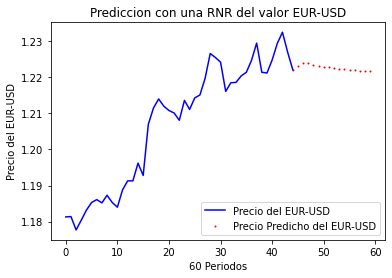

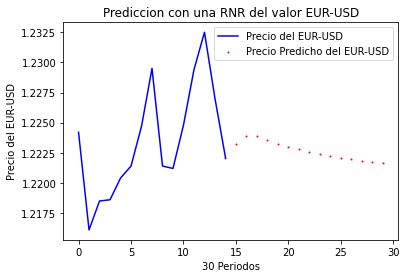

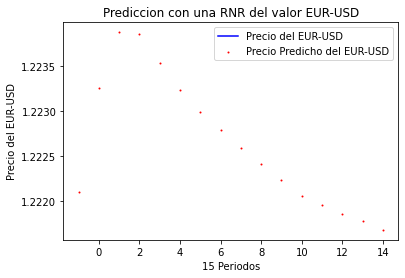

[None, None, None]

In [60]:
periodos_grafico = [60,30,15]
[graficar_resultado(i,dataset_total,periodos_a_predecir) for i in periodos_grafico]